# **TASK 3 - To Explore Unsupervised Machine Learning**

# **Unsupervised learning**

Unsupervised learning in essence is the machine learning task of uncovering the hidden patterns and structures from unlabled data.

Clustering algorithms fall under this category

#### **No pre-defined labels are assigned to past data**

For Example :

A business may wish to group its customers into distinct categories based on their purchasing behavior, without knowing in advance what these categories might be.

(This is known as CLUSTERING)

## **K means Clustering**

K-means Clustering is a type of Unsupervised learning, which is used when you have unlabeled data (i.e., data without defined categories or groups). 

The goal of this algorithm is to find groups in the data, with the number of groups represented by the variable K. 

The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. Data points are clustered based on feature similarity. 

The results of the K-means clustering algorithm are:


*   The centroids of the K clusters, which can be used to label new data
*   Labels for the training data (each data point is assigned to a single cluster)





## **K means Clustering with Python Scikit Learn**

In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement K means Clustering algorithm.

We will use the famous The Iris flower data.

We have to find out the Species to which the flower belongs based on Sepal length, Sepal width, Petal length and Petal width

In [16]:
# Importing all the required libraries 

import numpy as np # to perform calculations 
import pandas as pd # to read data
import matplotlib.pyplot as plt # to visualise
import seaborn as sns # to visualise
from sklearn import datasets # for loading the iris dataset

# Loading the iris dataset

In [17]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)

# Let's have a look at what our data is like

In [18]:
iris_df.shape

(150, 4)

In [19]:
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [20]:
iris_df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [21]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [22]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Let's plot our data points, so that we can have a better understanding of our data and it's distribution

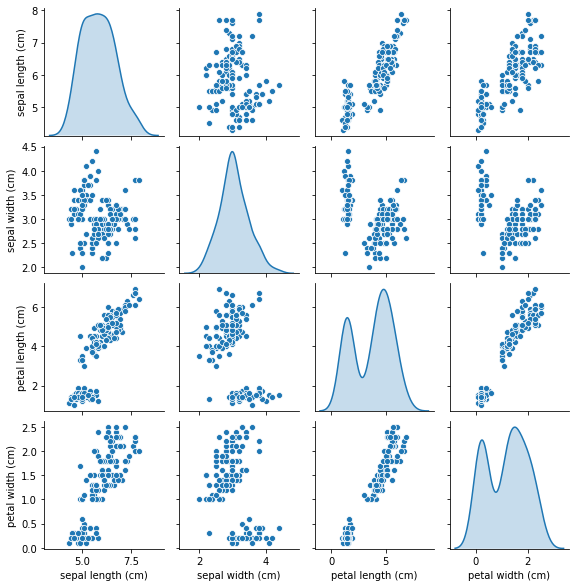

In [23]:
sns.pairplot(iris_df, height=2, diag_kind="kde")

#### From the graph above, we can clearly see that there is a segmentation/grouping in our data

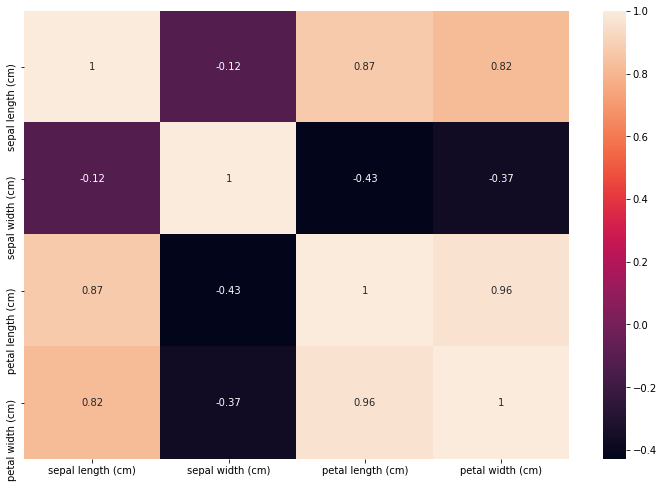

In [24]:
# Plotting heatmap to visualise correlation among features

plt.figure(figsize=(10,7))

sns.heatmap(iris_df.corr(), annot = True)

plt.tight_layout()

# Training the Algorithm

K-means clustering is a clustering algorithm that aims to partition n observations into k clusters.

There are 3 steps:

**Initialisation** – K initial “means” (centroids) are generated at random

**Assignment** – K clusters are created by associating each observation with the nearest centroid

**Update** – The centroid of the clusters becomes the new mean

Assignment and Update are repeated iteratively until convergence

The end result is that the sum of squared errors is minimised between points and their respective centroids.



### How do you find the optimum number of clusters for K Means?

### How does one determine the value of K?



> ### **The Elbow Method is one of the most popular methods to determine this optimal value of k.**

In [25]:
# Preparing the data

X = iris_df.iloc[:, [0, 1, 2, 3]].values

In [26]:
from sklearn.cluster import KMeans

wcss = [] # Within cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

wcss

[681.3706,
 152.34795176035792,
 78.85144142614601,
 57.25600931571815,
 46.44618205128205,
 39.03998724608725,
 34.299712121212124,
 30.014398496240602,
 28.036906353450473,
 26.53452922077922]

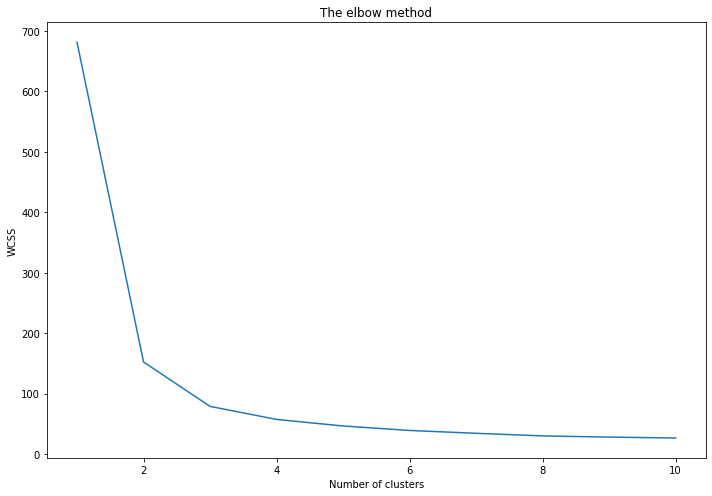

In [27]:
# Plotting the results onto a line graph, allowing us to observe 'The elbow'

plt.figure(figsize=(10,7))

plt.plot(range(1, 11), wcss)

plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.tight_layout()

We can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. 

This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as **' 3 '** .

In [28]:
# Applying kmeans to the dataset

kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

# Making Predictions

y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

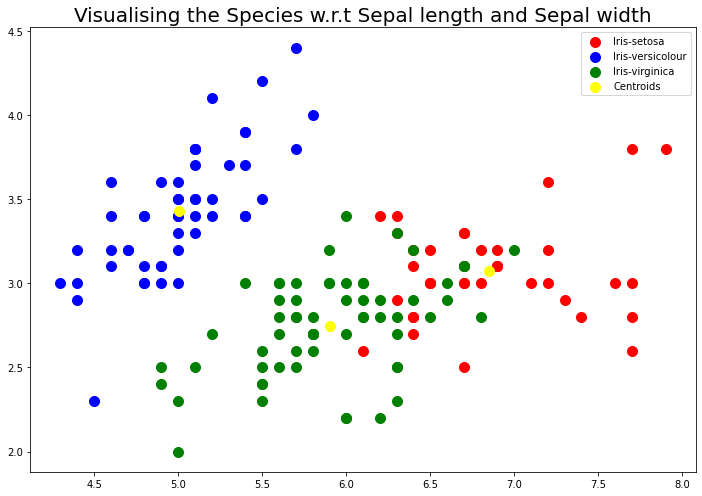

In [29]:
# Visualising the clusters - On the first two columns

plt.figure(figsize=(10,7))

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.title('Visualising the Species w.r.t Sepal length and Sepal width', fontsize=20)
plt.legend()
plt.tight_layout()

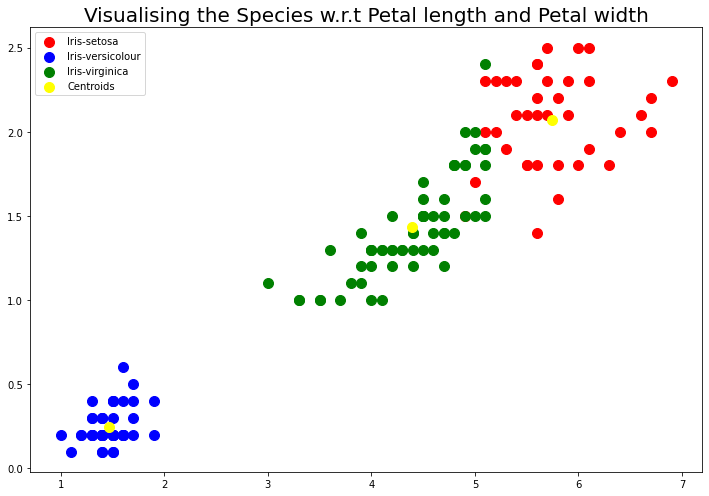

In [30]:
# Visualising the clusters - On the last two columns

plt.figure(figsize=(10,7))

plt.scatter(X[y_kmeans == 0, 2], X[y_kmeans == 0, 3], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 2], X[y_kmeans == 1, 3], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 2], X[y_kmeans == 2, 3],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters

plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.title('Visualising the Species w.r.t Petal length and Petal width', fontsize=20)
plt.legend()
plt.tight_layout()